In [27]:
# Importing the required packages
import igraph as ig
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import stats

# Specifying the figure parameters
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }
params = {'legend.fontsize': 16,
          'legend.handlelength': 2.}
plt.rcParams.update(params)


In [28]:
#Immunity simulations

def results(iters= 1,pop=10000,edge_per_node= 2,days=400,m=8, power = 1,immunity_length = 240,
            probs_inf=[0.01,0.01,0.1,0.2,0.3,0.3,0.3,0.25,0.2,0.15,0.1,0.05,0.01,0.01]):
    time_1perc_all = [] #time when 1% of the population is first infected
    tot_time_1perc_all = [] #total time for which 1% of the population is infected
    time_1hub_all = [] #time when the first hub is infected
    cl_coeffs_all = [] #clustering coefficient of network at each iteration
    S_final = []
    R_final = []
    I_final = []
    D_final = []
    T_final = []
    peak_time_all = []
    peak_perc_all = []
    for i in range(0,iters):
        time_1perc = False
        time_1hub = False
        tt = False
        tt_peak = False
        tot_time_1perc = 0.0
        I_stores = 0.0
        g = ig.Graph.Barabasi(pop, edge_per_node,power)
        g.vs["state"] = "S"
        g.vs["duration"] = 0
        g.vs["immune"] = 0
        i = rd.randint(0, pop-1)
        g.vs[i]["state"] = "I"
        for time in range(days): #no. of days
            for n in g.vs.select(state_eq = "I"): #iterates through each infected node in the network
                g.vs[n.index]["duration"] += 1 #from day 0 to infect_len this node continues to infect
                day_inf = g.vs[n.index]["duration"]
                for nb in g.neighbors(n): #iterates through neighbours of that node
                    if g.vs[nb]["state"] == "S": #if node is infected...
                        r = rd.random() #random state
                        if r < probs_inf[day_inf]:
                            g.vs[nb]["state"] = "I" #change state to infected 
                    if g.vs[nb]["state"] == "T":
                        r0 = rd.random()
                        if r0 < 0.17:
                            r1 = rd.random()
                            if r1 < probs_inf[day_inf]:
                                g.vs[nb]["state"] = "I" #change state to infected 
                        
                if g.vs[n.index]["duration"] >= rd.randrange(2,14): #after infect_len that node changes to recovered
                    g.vs[n.index]["state"] = "T"
                    g.vs[n.index]["immune"] = g.vs[n.index]["duration"]#number of days of immunity starts
                    g.vs[n.index]["duration"] = 0
                    g.vs[n.index]["immune"] += 1
                     
            
            for n in g.vs.select(state_eq = "T"):
                g.vs[n.index]["immune"] += 1
                if g.vs[n.index]["immune"] == immunity_length:
                    g.vs[n.index]["state"] = "S" 
                    g.vs[n.index]["duration"] = 0
            
            
            S_final.append(len(g.vs.select(state_eq = "S")))
            I_final.append(len(g.vs.select(state_eq = "I")))
            R_final.append(len(g.vs.select(state_eq = "R")))
            T_final.append(len(g.vs.select(state_eq = "T")))
           

            if days == 300:
                f = rd.randint(0, pop-1)
                if g.vs[f]["state"] == "S":
                    g.vs[f]["state"] = "I"

            if days == 600:
                f = rd.randint(0, pop-1)
                if g.vs[f]["state"] == "S":
                    g.vs[f]["state"] = "I"

            
#    return(peak_time_all, peak_perc_all, cl_coeffs_all, tot_time_1perc_all, time_1perc_all, time_1hub_all, S_final, I_final, R_final)


    figure, ax = plt.subplots(figsize=(4,5))   
    xs = range(days)
    series1 = np.array(S_final).astype(np.single).reshape(iters, days) #+ np.array(T_final).astype(np.single).reshape(iters, days)
    series2 = np.array(I_final).astype(np.single).reshape(iters, days)
    series3 = np.array(T_final).astype(np.single).reshape(iters, days)

    
    ax.plot(xs, series1[:iters].T, label = 'Susceptible', color = 'r',  linewidth= 0.5, alpha=0.3)
    ax.plot(xs, series3[:iters].T,label = 'Immune',  color='b',  linewidth=0.5, alpha=0.3)
    ax.plot(xs, series2[:iters].T, label = 'Infected', color = 'y',  linewidth=0.5, alpha=0.3)


    ax.set_xlabel('Days')
    ax.set_ylabel('Population')
    
    plt.tight_layout()
    plt.show()
   
    

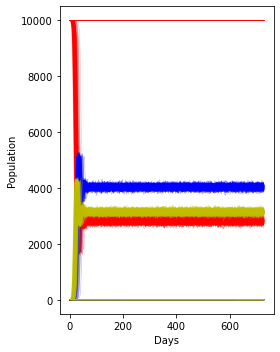

In [26]:
#No immunity
results(iters = 300, days = 730, pop = 10000, immunity_length = 15)

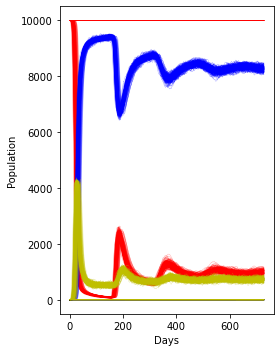

In [22]:
#5 months immunity
results(iters = 300, days = 730, pop = 10000, immunity_length = 150)

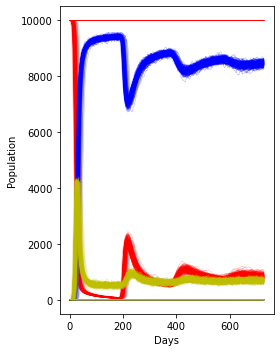

In [25]:
#6 months immunity
results(iters = 300, days = 730, pop = 10000, immunity_length = 180)

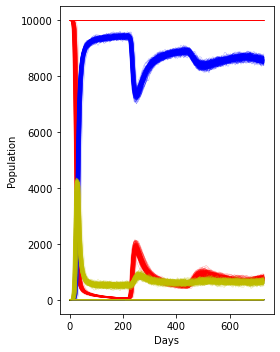

In [23]:
#7 months immunity
results(iters = 300, days = 730, pop = 10000, immunity_length = 210)

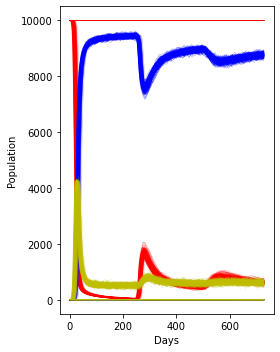

In [24]:
#8 months immunity
results(iters = 300, days = 730, pop = 10000, immunity_length = 240)

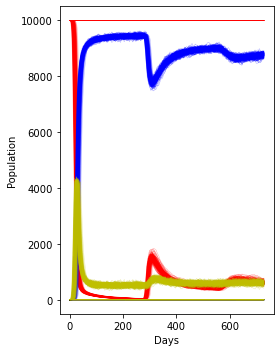

In [29]:
#9 months immunity
results(iters = 300, days = 730, pop = 10000, immunity_length = 270)